In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/module_5_auto.csv'

In [3]:
df = pd.read_csv(path)

In [4]:
df.head()

,Unnamed: 0.1,Unnamed: 0,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,0,0,3,122,alfa-romero,std,two,convertible,rwd,front,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,1,1,3,122,alfa-romero,std,two,convertible,rwd,front,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,2,2,1,122,alfa-romero,std,two,hatchback,rwd,front,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,3,3,2,164,audi,std,four,sedan,fwd,front,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,4,4,2,164,audi,std,four,sedan,4wd,front,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [5]:
# Only use numeric data
df = df._get_numeric_data()
df.head()

,Unnamed: 0.1,Unnamed: 0,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
0,0,0,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,0,1
1,1,1,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,0,1
2,2,2,1,122,94.5,0.822681,0.909722,52.4,2823,152,...,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,0,1
3,3,3,2,164,99.8,0.848630,0.919444,54.3,2337,109,...,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,0,1
4,4,4,2,164,99.4,0.848630,0.922222,54.3,2824,136,...,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,0,1


In [6]:
# Library for plotting 
from ipywidgets import interact, interactive, fixed, interact_manual

## Functions for plotting

In [7]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')

    plt.show()
    plt.close()

In [82]:
def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    
    #training data 
    #testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
 
    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()

## Part 1: Training and Testing 

#### We will place the target data price in a separate dataframe y_data (traing data vs. testing data)

In [9]:
y_data = df['price']

In [10]:
# Drop price data in dataframe x_data
x_data = df.drop('price', axis=1)

In [11]:
# Randomly split our data into training and testing data using the function train_test_split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.10, random_state=1)


print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 21
number of training samples: 180


In [12]:
# Use the function "train_test_split" to split up the dataset such that 40% of the data samples will be utilized for testing.
x_train1, x_test1,y_train1, y_test1 = train_test_split(x_data,y_data, test_size = 0.40, random_state = 0)
print("number of test samples :", x_test1.shape[0])
print("number of training samples:",x_train1.shape[0])

number of test samples : 81
number of training samples: 120


In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
lre = LinearRegression()

In [15]:
# fit the model using the feature 'horsepower'
lre.fit(x_train[['horsepower']],y_train)

LinearRegression()

In [16]:
# calculate R^2 on the test data
lre.score(x_test[['horsepower']],y_test)

0.3635875575078824

In [17]:
lre.score(x_train[['horsepower']],y_train)

0.6619724197515103

In [18]:
# Find the R^2 on the test data using 40% of the dataset for testing
x_train1,x_test1,y_train1,y_test1 = train_test_split(x_data, y_data, test_size = 0.40, random_state =0) 
lre.fit(x_train1[['horsepower']],y_train1)
lre.score(x_test1[['horsepower']],y_test1)

0.7139364665406973

## Cross-Validation score 

#### Sometimes you do not have sufficient testing data; as a result, you may want to perform cross-validation

In [19]:
from sklearn.model_selection import cross_val_score

We input the object, the feature ("horsepower"), and the target data (y_data). The parameter 'cv' determines the number of folds. In this case, it is 4.
The default scoring is average R^2,

In [27]:
Rcross = cross_val_score(lre, x_data[['horsepower']],y_data, cv=4)
Rcross
# cv: how many times you want to do validations

array([0.7746232 , 0.51716687, 0.74785353, 0.04839605])

In [21]:
# calculate the average and standard deviation of our estimate
print("The mean of the folds are", Rcross.mean(), "and the standard deviation is" , Rcross.std())

The mean of the folds are 0.522009915042119 and the standard deviation is 0.2911839444756029


In [32]:
#use negative squared error as a score by setting the parameter 'scoring' metric to 'neg_mean_squared_error'.
#mean_squared_error, are available as neg_mean_squared_error which return the negated value of the metric
Rcross_2 = -1*cross_val_score(lre,x_data[['horsepower']], y_data, cv=4, scoring = 'neg_mean_squared_error')
np.mean(Rcross_2)

23525298.54198599

In [34]:
# Calculate the average R^2 using two folds, then find the average R^2 for the second fold utilizing the "horsepower" feature:
rc = cross_val_score(lre,x_data[['horsepower']],y_data, cv=2)
rc.mean()

0.5166761697127429

##### cross_val_predict vs. cross_val_score : 


- **cross_val_score** returns score of test fold where cross_val_predict returns predicted y values for the test fold.For the cross_val_score(), you are using the average of the output, which will be affected by the number of folds because then it may have some folds which may have high error (not fit correctly).

- Whereas, **cross_val_predict()** returns, for each element in the input, the prediction that was obtained for that element when it was in the test set. Note that only cross-validation strategies that assign all elements to a test set exactly once can be used. So the increasing the number of folds, only increases the training data for the test element, and hence its result may not be affected much.

In [35]:
from sklearn.model_selection import cross_val_predict

In [37]:
yhat = cross_val_predict(lre,x_data[['horsepower']],y_data,cv=4)
yhat[0:5]

array([14141.63807508, 14141.63807508, 20814.29423473, 12745.03562306,
       14762.35027598])

### Part 2: Overfitting, underfitting and model selection

##### Create Multiple Linear Regression objects and train the model using 'horsepower', 'curb-weight', 'engine-size' and 'highway-mpg' as features.

In [47]:
lr = LinearRegression()
lr.fit(x_train[['horsepower','curb-weight','engine-size','highway-mpg']], y_train)

LinearRegression()

In [48]:
yhat_train = lr.predict(x_train[['horsepower','curb-weight','engine-size','highway-mpg']])
yhat_train[0:5]

array([ 7426.6731551 , 28323.75090803, 14213.38819709,  4052.34146983,
       34500.19124244])

C:\Users\QXJ\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\QXJ\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


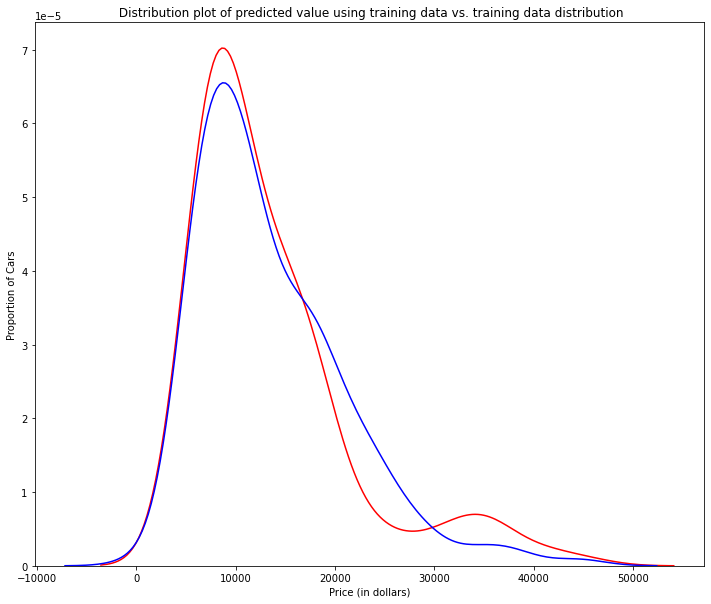

In [62]:
Title = ' Distribution plot of predicted value using training data vs. training data distribution'
DistributionPlot(y_train, yhat_train,'Actual value (train)', 'Predicted value(training)', Title)

In [66]:
yhat_test = lr.predict(x_test[['horsepower','curb-weight','engine-size','highway-mpg']])
yhat_test[0:5]

array([11349.35089149,  5884.11059106, 11208.6928275 ,  6641.07786278,
       15565.79920282])

C:\Users\QXJ\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\QXJ\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


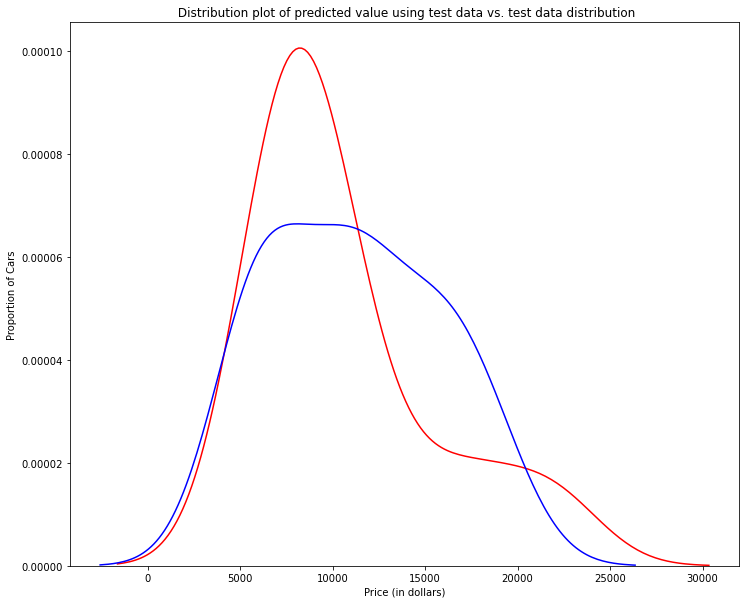

In [67]:
# test test_data in the same model 
Title = ' Distribution plot of predicted value using test data vs. test data distribution'
DistributionPlot(y_test,yhat_test,'Actual values(test)','Predicted values(test)', Title)

When the model generates new values from the test data, we see the distribution of the predicted values is much different from the actual target values. - **Overfitting** occurs when the model fits the noise, but not the underlying process. Therefore, when testing your model using the test set, your model does not perform as well since it is modelling noise, not the underlying process that generated the relationship.

In [69]:
# use ploynominal regression to test the data
from sklearn.preprocessing import PolynomialFeatures

In [70]:
x_train, x_test,y_train,y_test = train_test_split(x_data,y_data,test_size=0.45, random_state = 0)

In [72]:
pr = PolynomialFeatures(degree = 5)
x_train_pr = pr.fit_transform(x_train[['horsepower']]) 
x_test_pr = pr.fit_transform(x_test[['horsepower']])
pr

PolynomialFeatures(degree=5)

In [74]:
poly = LinearRegression()
poly.fit(x_train_pr,y_train)

LinearRegression()

In [75]:
# check the output
yhat = poly.predict(x_train_pr)
yhat[0:5]

array([13157.91334016, 21890.67003319,  6409.63339229, 21231.60727688,
        7905.4463452 ])

In [76]:
print("Predicted values:", yhat[0:4])
print('True values:',y_test[0:4])

Predicted values: [13157.91334016 21890.67003319  6409.63339229 21231.60727688]
True values: 18      6295.0
170    10698.0
107    13860.0
98     13499.0
Name: price, dtype: float64


In [84]:
poly.score(x_train_pr,y_train)

0.5567716902635091

In [85]:
poly.score(x_test_pr,y_test)

-29.871418859187518

**A negative score means overfitting**

Text(3, 0.75, 'Maximum R^2')

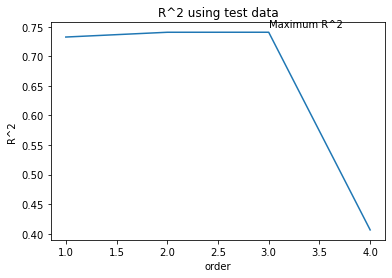

In [90]:
# check the score based on different degrees of poly 
Rsqu_test = []
order = [1,2,3,4,]
for n in order:
    pr = PolynomialFeatures(degree = n)
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    x_test_pr = pr.fit_transform(x_test[['horsepower']])
    lr.fit(x_train_pr,y_train)
    Rsqu_test.append(lr.score(x_test_pr,y_test))
    
plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 using test data')
plt.text(3,0.75, 'Maximum R^2')

**R^2 gradually increases until an order three polynomial is used. Then, the R^2 dramatically decreases at an order four polynomial**

In [95]:
# The following interface allows you to experiment with different polynomial orders and different amounts of data.
def f(order, test_data):
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=test_data, random_state = 0)
    pr = PolynomialFeatures(degree = order)
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    x_test_pr = pr.fit_transform(x_test[['horsepower']])
    poly = LinearRegression()
    poly.fit(x_train_pr,y_train)
    PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train,y_test, poly, pr)

In [97]:
interact(f, order =(0,6,1), test_data = (0.05,0.95,0.05))

interactive(children=(IntSlider(value=3, description='order', max=6), FloatSlider(value=0.45, description='tes…

<function __main__.f(order, test_data)>

In [98]:
pr1 = PolynomialFeatures(degree = 2)

In [101]:
# Transform the training and testing samples for the features 'horsepower', 'curb-weight', 'engine-size' and 'highway-mpg'. Hint: use the method "fit_transform".
x_train_pr1 = pr1.fit_transform(x_train[['horsepower','curb-weight','engine-size','highway-mpg']])
x_test_pr1=pr1.fit_transform(x_test[['horsepower','curb-weight','engine-size','highway-mpg']])

In [102]:
# check the dimensions
x_train_pr1.shape 
# 15 features

(110, 15)

In [103]:
# Create a linear regression model "poly1". Train the object using the method "fit" using the polynomial features.
poly1 = LinearRegression()
poly.fit(x_train_pr1,y_train)

LinearRegression()

In [107]:
#Use the method "predict" to predict an output on the polynomial features, then use the function "DistributionPlot" to display the distribution of the predicted test output vs. the actual test data.
yhat_test1 = poly.predict(x_train_pr1)
yhat2[0:5]

array([10399.34315408, 18062.32472042,  6381.11553582, 18897.14703781,
        7441.02963589])

C:\Users\QXJ\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\QXJ\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


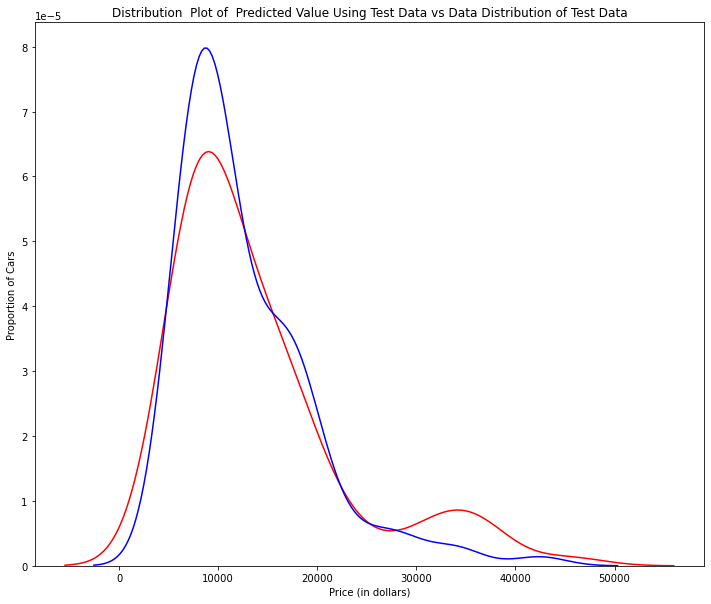

In [109]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,yhat_test1,'Actual values(test)', 'Predicted values(test)',Title)

*The predicted value is higher than actual value for cars where the price as  usd 10,000 range, conversely the predicted price is lower than the price cost in the usd 30,000 to usd 40,000 range. As such the model is not as accurate in these ranges.*

### Part 3: Ridge regression

There is the tendency for the regression model to overfit the data. In instances such as these we need to ensure that we balance between bias and variance.

Hence to overcome the problem of overfitting we use a machine learning algorithm called Ridge Regression. It is very similar to Linear Regression only that it differs in cost function.

In [111]:
# Perform a degree two polynomial transformation on our data.
pr = PolynomialFeatures(degree = 2)
x_train_pr = pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])
x_test_pr = pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])

In [112]:
from sklearn.linear_model import Ridge

In [113]:
# Let's create a Ridge regression object, setting the regularization parameter (alpha) to 0.1
RigeModel = Ridge(alpha=1)

In [131]:
RigeModel.fit(x_train_pr,y_train)
RigeModel.score(x_test_pr,y_test)

0.5418576440207269

In [115]:
yhat=RigeModel.predict(x_test_pr)

In [118]:
print('predicted:',yhat[0:4])
print('test set:',y_test[0:4].values)

predicted: [ 6570.82441941  9636.24891471 20949.92322737 19403.60313255]
test set: [ 6295. 10698. 13860. 13499.]


**We select the value of alpha that minimizes the test error. To do so, we can use a for loop. We have also created a progress bar to see how many iterations we have completed so far.**

In [128]:
from tqdm import tqdm

Rsqu_test = []
Rsqu_train = []
dummy1 = []
Alpha = 10 * np.array(range(0,1000))
pbar = tqdm(Alpha)

for alpha in pbar:
    RigeModel = Ridge(alpha = alpha)
    RigeModel.fit(x_train_pr,y_train)
    test_score, train_score = RigeModel.score(x_test_pr,y_test), RigeModel.score(x_train_pr,y_train)
    
    pbar.set_postfix({'Test score':test_score,'Train score':train_score})
    
    Rsqu_test.append(test_score)
    Rsqu_train.append(train_score)

100%|████████████████████████████████████████| 1000/1000 [00:02<00:00, 450.01it/s, Test score=0.564, Train score=0.859]


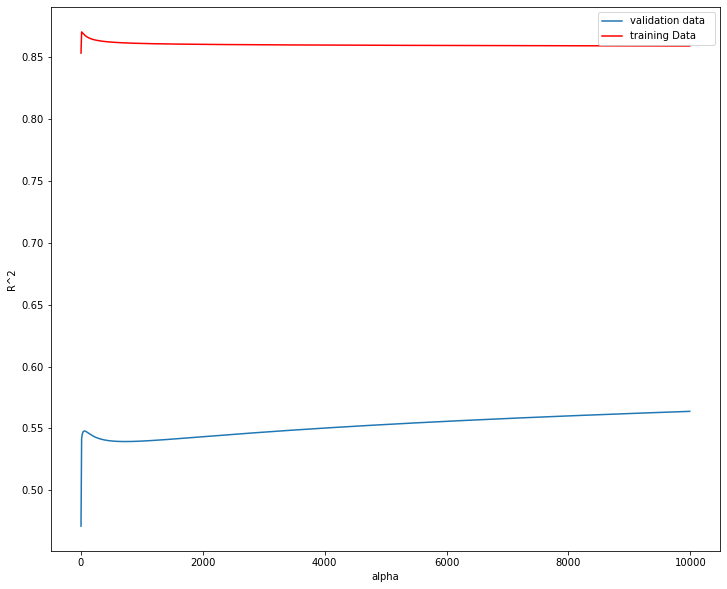

In [129]:
# Plot out the value of R^2 for different alphas
width = 12
height = 10
plt.figure(figsize=(width, height))

plt.plot(Alpha,Rsqu_test, label='validation data  ')
plt.plot(Alpha,Rsqu_train, 'r', label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

 <span style="color:purple;font-weight:100;font-size:10 px"> The x-axis represents the different values of Alpha.
The blue line represents the R^2 of the validation data: As the value for alpha increases, the R^2 increases and converges at a point; The red line represents the R^2 of the training data: As alpha increases the R^2 decreases. Therefore, as alpha increases, the model performs worse on the training data.
</span>

In [132]:
# change alpha to 10 
RigeModel = Ridge(alpha = 8000)
RigeModel.fit(x_train_pr,y_train)
RigeModel.score(x_test_pr,y_test)


0.5601023552446778

#### Part 4: Grid Search

*The term alpha is a hyperparameter. Sklearn has the class <b>GridSearchCV</b> to make the process of finding the best hyperparameter simpler.*

In [133]:
from sklearn.model_selection import GridSearchCV

In [136]:
# Create a dictionary of parameter values
parameters1 = [{'alpha':[0.001,0.1,1,10,1000,10000,100000,1000000]}]
parameters1

[{'alpha': [0.001, 0.1, 1, 10, 1000, 10000, 100000, 1000000]}]

In [137]:
# Creae a Ridge regression object
RR = Ridge()
RR

Ridge()

In [138]:
# Create a ridge search object
Grid1 = GridSearchCV(RR, parameters1,cv=4)

In [139]:
# Fit the model
Grid1.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_data)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 1000, 10000, 100000,
                                    1000000]}])

In [142]:
BestRR = Grid1.best_estimator_
BestRR

Ridge(alpha=10000)

In [143]:
# Test the model
BestRR.score(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']],y_test)

0.8411649831036149

### Conclusion:  

Best fit model is **Ridge regression model** with **R^2 = 0.8411** in the test set.